## Semantic Segmentation

Semantic segmentation, which is a pixel-level labeling for image classification, is an important technique for the scene understanding. Because each pixel is labeled as belonging to a given semantic class. 

Autonomous driving will be one of the revolutionary technologies in the near future in terms of the impact on the lives of people living in industrially developed
countries. An autonomous vehicle must sense its surroundings and act safely to reach a certain target. Such functionality is carried out by using several types of classifiers. 

In a typical task of scene understanding, the classes could be road, street, traffic signs, street markings, cars, pedestrians, sidewalks, trees. 


In [2]:

import tensorflow
tensorflow.__version__

'2.7.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the dataset

In [3]:
'''
import os
os.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')
path = '.'
'''

"\nimport os\nos.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')\npath = '.'\n"

In [4]:
from zipfile import ZipFile
with ZipFile('data_semantics.zip','r') as z:
    z.extractall()

In [4]:
ls

drive/  sample_data/  testing/  training/


In [6]:
pwd

'/content'

In [5]:
project_path = "Segmentation/"

In [6]:
#Image Settings -

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


In [18]:
#Getting the image list 
import os
original  = os.listdir('./training/image_2')

In [19]:
print(original)

['000121_10.png', '000094_10.png', '000043_10.png', '000045_10.png', '000031_10.png', '000153_10.png', '000038_10.png', '000195_10.png', '000193_10.png', '000113_10.png', '000050_10.png', '000152_10.png', '000148_10.png', '000116_10.png', '000198_10.png', '000040_10.png', '000093_10.png', '000010_10.png', '000023_10.png', '000149_10.png', '000008_10.png', '000197_10.png', '000052_10.png', '000105_10.png', '000068_10.png', '000017_10.png', '000165_10.png', '000009_10.png', '000158_10.png', '000114_10.png', '000095_10.png', '000174_10.png', '000107_10.png', '000067_10.png', '000117_10.png', '000156_10.png', '000188_10.png', '000055_10.png', '000175_10.png', '000109_10.png', '000075_10.png', '000124_10.png', '000180_10.png', '000144_10.png', '000032_10.png', '000065_10.png', '000004_10.png', '000106_10.png', '000166_10.png', '000000_10.png', '000003_10.png', '000145_10.png', '000021_10.png', '000011_10.png', '000110_10.png', '000111_10.png', '000066_10.png', '000041_10.png', '000154_10.pn

In [20]:
masks  = os.listdir('./training/semantic')

In [21]:
print(masks)

['000121_10.png', '000094_10.png', '000043_10.png', '000045_10.png', '000031_10.png', '000153_10.png', '000038_10.png', '000195_10.png', '000193_10.png', '000113_10.png', '000050_10.png', '000152_10.png', '000148_10.png', '000116_10.png', '000198_10.png', '000040_10.png', '000093_10.png', '000010_10.png', '000023_10.png', '000149_10.png', '000008_10.png', '000197_10.png', '000052_10.png', '000105_10.png', '000068_10.png', '000017_10.png', '000165_10.png', '000009_10.png', '000158_10.png', '000114_10.png', '000095_10.png', '000174_10.png', '000107_10.png', '000067_10.png', '000117_10.png', '000156_10.png', '000188_10.png', '000055_10.png', '000175_10.png', '000109_10.png', '000075_10.png', '000124_10.png', '000180_10.png', '000144_10.png', '000032_10.png', '000065_10.png', '000004_10.png', '000106_10.png', '000166_10.png', '000000_10.png', '000003_10.png', '000145_10.png', '000021_10.png', '000011_10.png', '000110_10.png', '000111_10.png', '000066_10.png', '000041_10.png', '000154_10.pn

In [22]:
# # Separating  mask and images 
# masks = []
# originazzzzl = []
# for filename in mylist:
#     if filename.endswith('.png'):
#         masks.append(filename)
#     if filename.endswith('.jpg'):
#         original.append(filename)

In [23]:
#Sorting
original.sort()
masks.sort()

In [25]:
#Checkout image names
print(original[-1])
print(masks[-1])
print(original[1])
print(masks[1])


000199_10.png
000199_10.png
000001_10.png
000001_10.png


In [26]:
import cv2
import matplotlib.pyplot as plt

In [27]:
#Get the data -  X and y
import numpy as np

y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

X = np.zeros((len(original), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join('./training/image_2', file)
    #path1 = './images/Abyssinian_34.jpg'
    img = cv2.imread(path1,1)
    try:
#         print(img.shape)
        img = cv2.resize(img, (128,128))
#         print(img.shape)
#         img = img[..., np.newaxis]
        X[n] = img/ 255
        file2 = masks[n]
        #n = masks.index(file)
        path2 = os.path.join('./training/semantic_rgb', file2)
        # Load images
              
        mask = np.array(cv2.imread(path2, 1))
#         print(mask.shape)
#         mask = (mask<12)*1.0
        mask = cv2.resize(mask, (128, 128))
#         mask = mask[:, :, :]
#         mask = mask[..., np.newaxis]
#         print(mask.shape)
#         mask = 1.0*(mask[:,:,0]>12)
        y[n] = mask/255
#         y[n,:,:] = np.squeeze(mask)
#         print(y.shape)
    except Exception as e:
        print(e)
        print(path1)


In [28]:
#Check the data
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


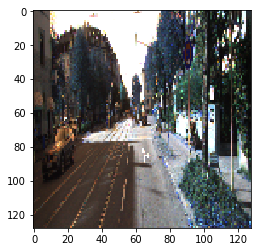

In [29]:
#Check the images
plt.imshow(X[1])

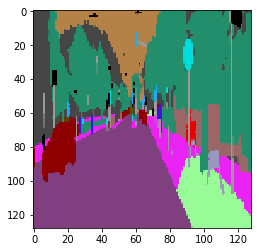

In [30]:
plt.imshow(y[1])

(375, 1242, 3)


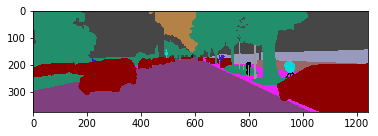

In [31]:
a = './training/semantic_rgb/000000_10.png'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(128, 128, 3)


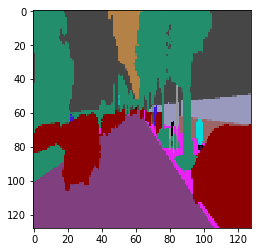

In [32]:
img = cv2.resize(img, (128, 128))
print(img.shape)
# img = img[:,:, :]
plt.imshow(img)

In [33]:
#Install segmentation models. 
#The segmentation_model was written with the following versions of keras and tensorflow, so we need to downgrade the following modules
#After running this code block, comment the whole code block and restart and run the code
!pip install git+https://github.com/qubvel/segmentation_models
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install keras_applications==1.0.8
!pip install image-classifiers==1.0.0
!pip install efficientnet==1.0.0


  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-8xaqygm0
    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:01
  Stored in directory: /tmp/pip-ephem-wheel-cache-n8qicwwi/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models
    100% |████████████████████████████████| 378kB 6.8MB/s eta 0:00:01
tensorflow 2.7.0 has requirement keras<2.8,>=2.7.0rc0, but you'll have keras 2.3.1 which is incompatible.
  Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
    100% |████████████████████████████████| 421.8MB 93kB/s eta 0:00:011    79% |█████████████████████████▍      | 335.2MB 8.2MB/s eta 0:00:11    99% |███████████████████████████████▉| 420.3MB 3.3MB/s eta 0:00:01
    100% |████████████████████████████████| 450kB 5.4MB/s ta 0:00:01
    100% |████████████████████████████████| 26.1MB 1.4MB/s ta 0:00:011


    100% |████████████████████████████████| 3.9MB 1.9MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 7.0MB/s ta 0:00:01
  Stored in directory: /home/blink/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:
      Successfully uninstalled scipy-1.2.1
  Found existing installation: google-auth 2.3.3
    Uninstalling google-auth-2.3.3:
      Successfully uninstalled google-auth-2.3.3
  Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: tensorflow 2.7.0
    Uninstalling t

In [34]:
#Import libraries
import segmentation_models
segmentation_models.set_framework('tf.keras')
from segmentation_models import Unet
from segmentation_models.backbones.backbones_factory import Backbones
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

ImportError: cannot import name 'asmatrix' from 'scipy.sparse.sputils' (/home/blink/anaconda3/lib/python3.7/site-packages/scipy/sparse/sputils.py)

In [ ]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

In [ ]:
BACKBONE = 'resnet34'
preprocess_input = Backbones.get_preprocessing(BACKBONE)

In [ ]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [ ]:
x_val.shape

In [ ]:
x_train.shape

In [ ]:
#Build your model 

N = x_train.shape[-1]

base_model = Unet(backbone_name='inceptionv3', encoder_weights='imagenet')

inp = Input(shape=(128, 128, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)
l2 = Conv2D(3, (1, 1))(out)
model = Model(inp, l2, name=base_model.name)
model.summary()

In [ ]:
base_model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

In [ ]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [ ]:
# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,    
    epochs=100,
    validation_data=(x_val, y_valid),
)

In [ ]:
model.evaluate(x_val, y_valid, verbose=1)

In [ ]:
# Predict on train, val and test
preds_train = model.predict(x_train, verbose=1)
preds_val = model.predict(x_val, verbose=1)

import numpy as np

# Threshold predictions
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)

In [ ]:
preds_train[0].shape

In [ ]:
#Save weights
from tensorflow.keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(x_train[3])

In [ ]:
plt.imshow(preds_train[3])